<a href="https://colab.research.google.com/github/sj2609/Introduction-to-Computational-Statistics-and-Statistical-Learning/blob/main/CSSL_06_polynomial_regression_bias_variance_tradeoff.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Polynomial regression
Let's try loading a dataset a dataset from Kaggle. To do this, you will need to [create a legacy API key from Kaggle](https://www.kaggle.com/settings). This will download a kaggle.json file.

In [18]:
from google.colab import files
files.upload()

KeyboardInterrupt: 

In [ ]:
# Change the permissions of the kaggle.json file such that only you can read/write the file.
# This is to prevent someone else from modifying the file.
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!pip install -q kaggle # Install that Kaggle package to interact with Kaggle's datasets; pip is python's package manager

In [ ]:
!kaggle datasets download -d mirajdeepbhandari/polynomial-regression

In [ ]:
!unzip polynomial-regression.zip

In [ ]:
# Import necessary packages
import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error,r2_score
from sklearn.preprocessing import scale, PolynomialFeatures
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, r2_score
from sklearn.metrics import PredictionErrorDisplay

In [ ]:
os.listdir() # Look for the files/directories within the current directory

The Ice_cream selling data.csv is available!

In [ ]:
data = pd.read_csv("Ice_cream selling data.csv") # Read the csv file into a pandas dataframe
type(data)

In [ ]:
data.head()

In [ ]:
data.shape

In [ ]:
data.info() # Gives basic information about the dataframe

In [ ]:
data.describe() # Gives basic statistics about the columns of the dataframe

In [ ]:
data.head()

In [ ]:
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

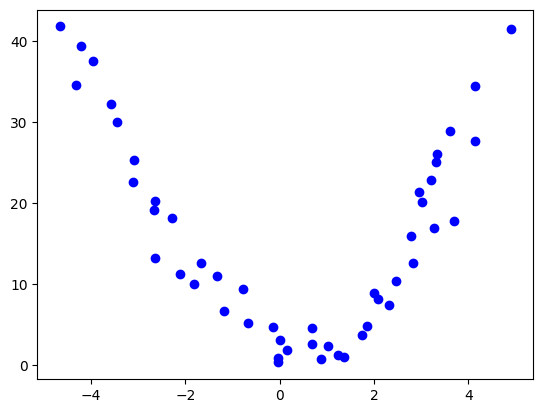

In [24]:
plt.scatter(X,y,color="blue")
plt.show()

In [39]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 31)
# print(X_train,X_test,y_train,y_test)

In [40]:
model = LinearRegression()    # defining the type of model
model.fit(X_train,y_train)

LinearRegression()

In [46]:
r2_train = model.score(X_train,y_train)
r2_test = model.score(X_test,y_test)
print(r2_train,r2_test)

0.00662814064828976 -0.3097134799775425


In [45]:
predict = np.round(model.predict(X_test),decimals=1)
predict
pd.DataFrame({"Actual Performance": y_test,"Predicted Performace":predict})

,Actual Performance,Predicted Performace
19,4.673643,14.1
4,32.284531,12.8
5,30.001138,12.8
24,2.576782,14.4
2,39.383001,12.5
33,8.170735,15.0
0,41.842986,12.3
14,12.615181,13.5
45,17.843957,15.6
42,25.142082,15.4


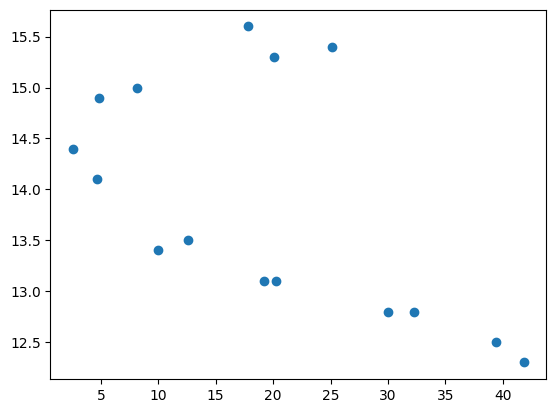

In [44]:
plt.scatter(y_test,predict)

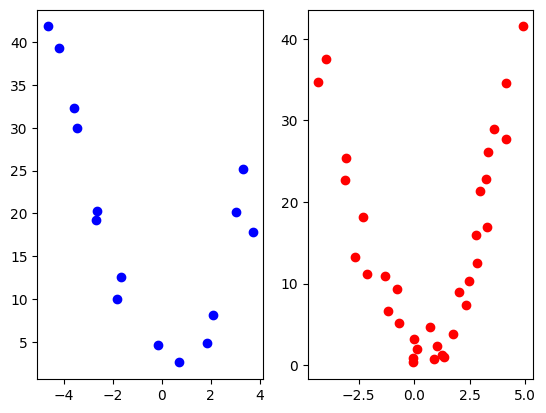

In [57]:
plt.subplot(1,2,1)
plt.scatter(X_test,y_test,color="blue")

plt.subplot(1,2,2)
plt.scatter(X_train,y_train,color="red")


In [48]:
print(model.coef_, model.intercept_)

[0.38857842] 14.152732810803345


LinearRegression()

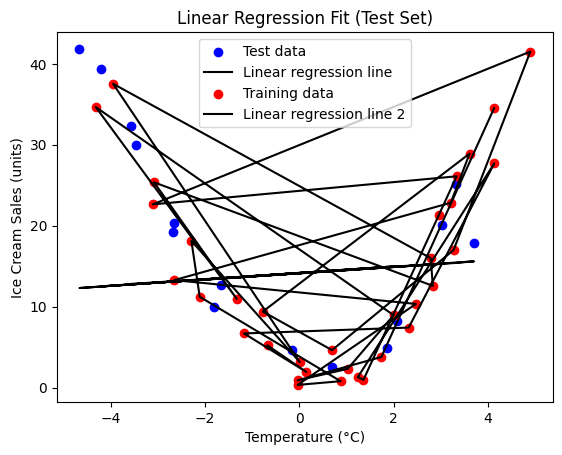

In [61]:
plt.scatter(X_test, y_test, color='blue', label='Test data')
plt.plot(X_test, predict, color='black', label='Linear regression line')
plt.scatter(X_train, y_train, color='red', label='Training data')
plt.plot(X_train, y_train, color='black', label='Linear regression line 2')
plt.title('Linear Regression Fit (Test Set)')
plt.xlabel('Temperature (°C)')
plt.ylabel('Ice Cream Sales (units)')
plt.legend()
plt.show()

how are we getting negative r-squared?

As discussed earlier, the current linear model does not fit the data well, indicated by the very low R-squared scores and the plot above. Given the notebook's title 'Polynomial regression', it's likely that a polynomial model would be a more appropriate choice for this dataset. This involves transforming the input features to include polynomial terms (e.g., $X^2$, $X^3$) and then fitting a linear model to these transformed features. This allows the model to capture non-linear relationships between the temperature and ice cream sales.

## POLYNOMIAL REGRESSION

In [66]:
poly_features=PolynomialFeatures(degree=2)
X_transformed = poly_features.fit_transform(X)
print(X_transformed)    # 2 column is X and 3rd column is the square of the 2nd column
print(X_transformed[0], X_transformed[0,1]**2)   # checking


[[ 1.00000000e+00 -4.66226268e+00  2.17366933e+01]
 [ 1.00000000e+00 -4.31655945e+00  1.86326855e+01]
 [ 1.00000000e+00 -4.21398476e+00  1.77576676e+01]
 [ 1.00000000e+00 -3.94966109e+00  1.55998227e+01]
 [ 1.00000000e+00 -3.57855372e+00  1.28060467e+01]
 [ 1.00000000e+00 -3.45571170e+00  1.19419433e+01]
 [ 1.00000000e+00 -3.10844012e+00  9.66239999e+00]
 [ 1.00000000e+00 -3.08130332e+00  9.49443018e+00]
 [ 1.00000000e+00 -2.67246083e+00  7.14204687e+00]
 [ 1.00000000e+00 -2.65228679e+00  7.03462523e+00]
 [ 1.00000000e+00 -2.65149803e+00  7.03044182e+00]
 [ 1.00000000e+00 -2.28826400e+00  5.23615213e+00]
 [ 1.00000000e+00 -2.11186969e+00  4.45999359e+00]
 [ 1.00000000e+00 -1.81893761e+00  3.30853403e+00]
 [ 1.00000000e+00 -1.66034773e+00  2.75675458e+00]
 [ 1.00000000e+00 -1.32637898e+00  1.75928121e+00]
 [ 1.00000000e+00 -1.17312327e+00  1.37621820e+00]
 [ 1.00000000e+00 -7.73330043e-01  5.98039356e-01]
 [ 1.00000000e+00 -6.73752802e-01  4.53942838e-01]
 [ 1.00000000e+00 -1.49634867e-

### Degree 2

In [75]:
X_train, X_test, y_train, y_test = train_test_split(X_transformed, y, test_size = 0.3, random_state = 31)
model.fit(X_train,y_train)
r2_train = model.score(X_train,y_train)
r2_test = model.score(X_test,y_test)
print(r2_train,r2_test)

y_pred_train=model.predict(X_train)
y_pred_test=model.predict(X_test)

train_error=mean_squared_error(y_train,y_pred_train)
test_error=mean_squared_error(y_test,y_pred_test)

print(train_error,test_error)


0.9297541943753348 0.9264047412544956
9.888787228431406 10.742234698173167
